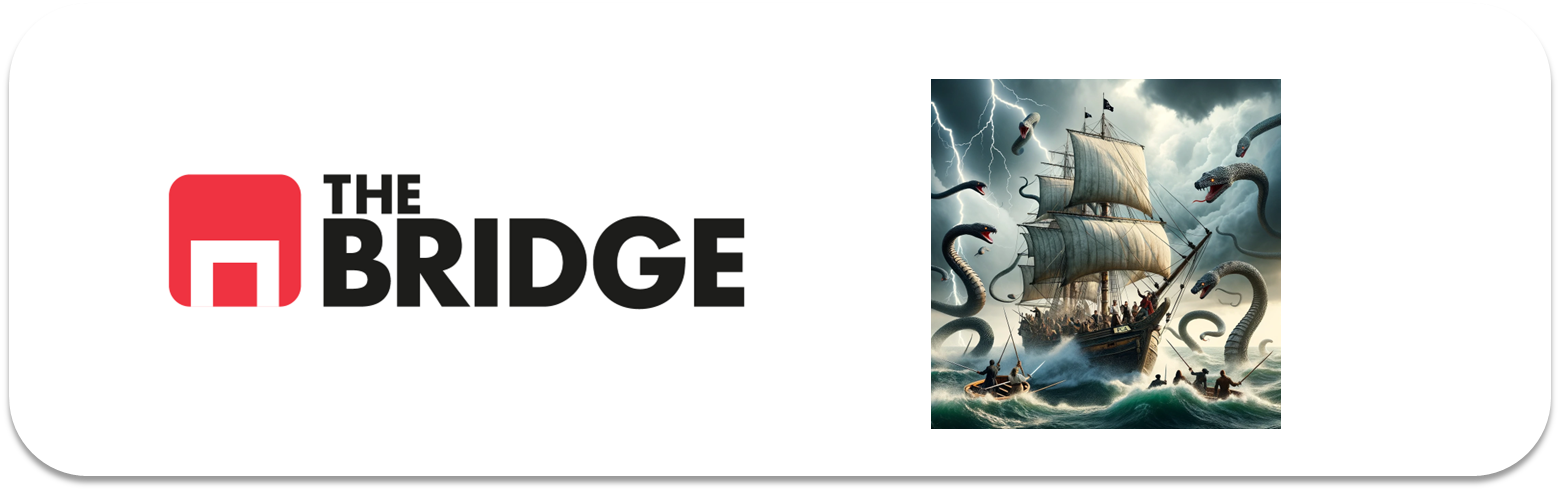

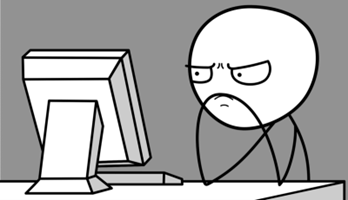

Para ejercitarte y afianzar lo aprendido sobre **PCA**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)

La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

# Principal Components Analysis: Nutrition
En esta colección de ejercicios no vas a montar ningún modelo de Machine Learning supervisado, sino que vas a practicar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlas, pintar y escoger número de componentes según varianza.


### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Ejercicio 1: Importa los datos
1. Importa los datos: *nutrition.csv*
2. Observa las columnas que hay, así como su tipo.

In [2]:
df = pd.read_csv('./data/nutrition.csv')

In [5]:
df.sample(5)

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
1434,6423,"Soups, Sauces, and Gravies","SOUP,CHICK W/ RICE,CND,PREP W/ EQ VOLUME H2O","Soup, chicken with rice, canned, prepared with...",NaN,NaN,NaN,24.0,1.45,0.78,...,0.000,0.028688,0.007692,0.005833,0.007500,0.000059,0.000000,0.012857,0.038182,0.010000
7788,28052,Baked Products,"KEEBLER,CHIPS DELUXE,CHOC LOVERS COOKIES","KEEBLER, CHIPS DELUXE, Chocolate Lovers Cookies",NaN,"Kellogg, Co.",NaN,508.0,5.50,27.20,...,0.000,0.131250,0.153846,0.233333,0.000000,0.000000,0.123810,0.220000,0.000000,0.081818
5329,17251,"Lamb, Veal, and Game Products","LAMB,DOM,SHLDR,BLADE,LN&FAT,1/8""FAT,CHOIC,CKD,...","Lamb, domestic, shoulder, blade, separable lea...",NaN,NaN,NaN,339.0,28.92,23.88,...,0.045,0.375000,0.161538,0.050000,0.022500,0.000134,0.057143,0.267143,0.609091,0.634545
6831,21341,Fast Foods,"MCDONALD'S,BIG BRKFST","McDONALD'S, BIG BREAKFAST",NaN,McDonald's Corporation,NaN,285.0,10.16,19.37,...,0.000,0.142063,0.270769,0.190833,0.042500,0.000091,0.035714,0.365714,0.000000,0.088182
6936,21478,Fast Foods,"DIGIORNO PIZZA,PEPPERONI TOPPING,THIN CRISPY C...","DIGIORNO Pizza, pepperoni topping, thin crispy...",NaN,"Kraft Foods, Inc.",NaN,283.0,13.22,12.86,...,0.000,0.128312,0.096154,0.119167,0.174167,0.000120,0.066667,0.304286,0.438182,0.149091


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


### Ejercicio 2


Analiza la correlación entre las variables numéricas. 

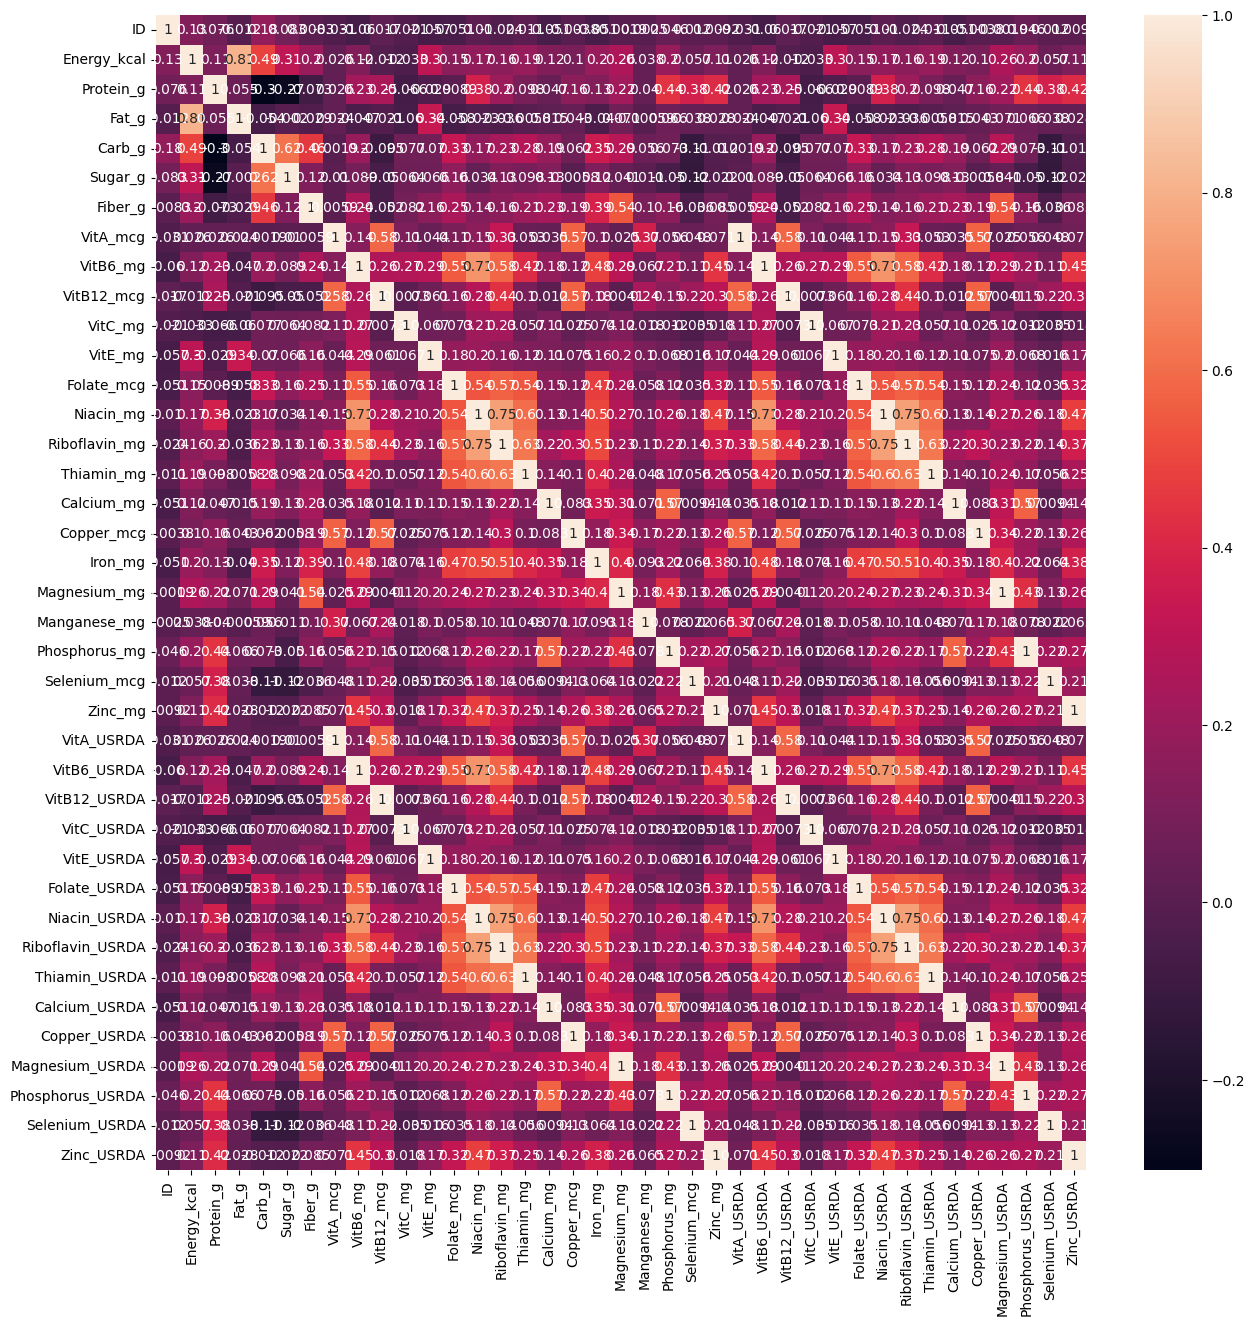

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only=True), annot=True);

In [11]:
#no se ve nada, solo la diagonal de 1

### Ejercicio 3

¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

In [13]:
columnas_USRDA = [x for x in df.columns if x.endswith('USRDA')]

In [17]:
df[columnas_USRDA].describe().T

,count,mean,std,min,25%,50%,75%,max
VitA_USRDA,8618.0,0.104410,0.865958,0.0,0.000000,0.001667,0.023333,33.333333
VitB6_USRDA,8618.0,0.155511,0.281538,0.0,0.020147,0.070588,0.208824,7.058824
VitB12_USRDA,8618.0,0.510525,1.799659,0.0,0.000000,0.033333,0.540625,41.204167
VitC_USRDA,8618.0,0.088060,0.639808,0.0,0.000000,0.000000,0.027778,26.666667
VitE_USRDA,8618.0,0.058155,0.256602,0.0,0.000000,0.007333,0.030000,9.960000
Folate_USRDA,8618.0,0.125765,0.466402,0.0,0.000000,0.017500,0.062500,14.702500
Niacin_USRDA,8618.0,0.213222,0.302161,0.0,0.023875,0.131250,0.314328,7.968750
Riboflavin_USRDA,8618.0,0.182499,0.346062,0.0,0.035385,0.115385,0.200000,13.461538
Thiamin_USRDA,8618.0,0.174881,0.431974,0.0,0.025000,0.064583,0.185833,19.479167
Calcium_USRDA,8618.0,0.061176,0.167803,0.0,0.007500,0.015833,0.051667,6.136667


In [18]:
# estas columnas se repiten arriba, las voy a borrar

In [19]:
df.drop(columns=columnas_USRDA, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              8618 non-null   int64  
 1   FoodGroup       8618 non-null   object 
 2   ShortDescrip    8618 non-null   object 
 3   Descrip         8618 non-null   object 
 4   CommonName      1063 non-null   object 
 5   MfgName         1560 non-null   object 
 6   ScientificName  732 non-null    object 
 7   Energy_kcal     8618 non-null   float64
 8   Protein_g       8618 non-null   float64
 9   Fat_g           8618 non-null   float64
 10  Carb_g          8618 non-null   float64
 11  Sugar_g         8618 non-null   float64
 12  Fiber_g         8618 non-null   float64
 13  VitA_mcg        8618 non-null   float64
 14  VitB6_mg        8618 non-null   float64
 15  VitB12_mcg      8618 non-null   float64
 16  VitC_mg         8618 non-null   float64
 17  VitE_mg         8618 non-null   f

### Ejercicio 4: Variables Categóricas

Podríamos analizar las variables no numéricas del dataset e intentar obtener más información, pero por simplicidad en este caso procedemos a eliminarlas. Elimina las variables de texto del dataset.

In [27]:
categoricas = [x for x in df.columns if df[x].dtype == 'object']

In [28]:
categoricas

['FoodGroup',
 'ShortDescrip',
 'Descrip',
 'CommonName',
 'MfgName',
 'ScientificName']

In [29]:
df.drop(columns=categoricas, inplace=True)

### Ejercicio 5: Distribuciones

Analiza la distribución de las variables/columnas/features restantes. Recuerda que PCA es altamente sensible a las escala, así que transforma aquellas variables que creas necesario antes de proceder a escalarlas.


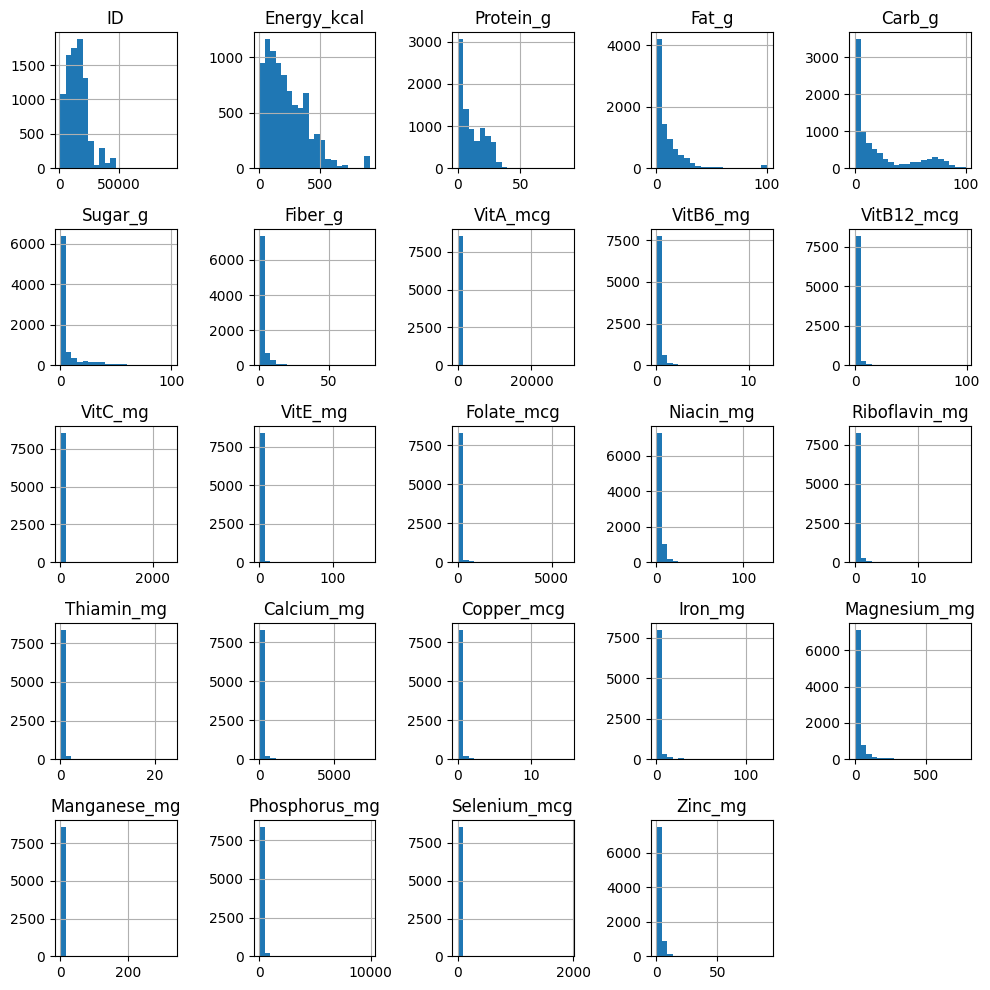

In [35]:
df.hist(bins=20,figsize=(10,10))
plt.tight_layout();

In [36]:
# voy a tranformar las columnas para que esten mas centradas

In [37]:
df_tranformado = np.log1p(df)

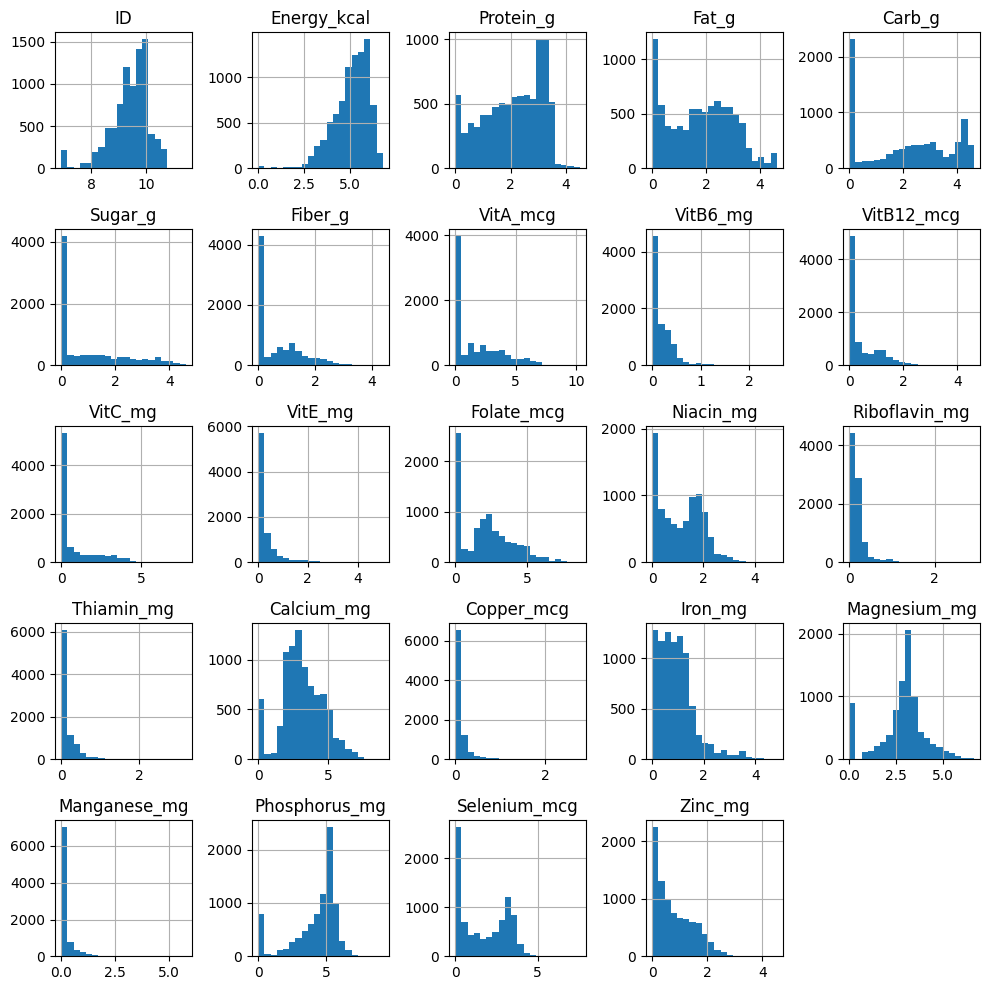

In [38]:
df_tranformado.hist(bins=20,figsize=(10,10))
plt.tight_layout();

In [39]:
# ahora se ve mejor

### Ejercicio 6: Estandarizado
Estandariza cada variable. (No es necesario que dividas en train y test por simplificar).

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [41]:
df_scaler = scaler.fit_transform(df_tranformado)

In [43]:
df_scaler = pd.DataFrame(
    data = df_scaler,
    columns = df_tranformado.columns
)

In [44]:
df_scaler

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,-3.480717,1.540414,-1.379699,2.222526,-1.279339,-0.751381,-0.817818,2.363105,-0.811366,-0.453749,...,-0.685619,-0.682602,0.043491,-0.624237,-1.290969,-1.323615,-0.478294,-0.607193,-0.700775,-1.026533
1,-3.479343,1.540414,-1.379699,2.222526,-1.279339,-0.751381,-0.817818,2.363105,-0.811366,-0.506894,...,-0.685619,-0.682602,0.043491,-0.545958,-1.110402,-1.323615,-0.467870,-0.630949,-0.700775,-1.080292
2,-3.477969,1.745661,-1.728220,2.393490,-1.315522,-0.796963,-0.817818,2.463472,-0.819681,-0.678411,...,-0.816970,-0.700558,-1.024481,-0.619308,-1.318770,-2.173767,-0.478294,-1.673624,-1.184060,-1.136139
3,-3.476598,0.814824,0.980084,1.362565,-0.566664,-0.479778,-0.817818,1.758419,-0.184016,0.524785,...,0.653867,-0.576344,2.068775,-0.430822,-0.939676,0.285544,-0.454898,0.988529,0.726947,0.715166
4,-3.475227,0.865713,1.054782,1.388915,-0.488178,-0.474580,-0.817818,1.947668,-0.561485,0.552068,...,0.549115,-0.642461,2.230503,-0.507280,-0.816626,0.317134,-0.447146,1.077376,0.726947,0.691398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,2.607443,0.665317,0.848892,1.252011,-1.315522,-0.796963,-0.817818,1.062751,0.607592,3.225009,...,-0.036792,-0.615898,0.697647,-0.154219,-0.089688,1.007399,-0.478294,0.744270,1.820639,-0.083621
8614,2.720860,-0.365945,0.943039,-0.993791,-0.161868,-0.796963,-0.817818,-0.293552,-0.381569,1.059341,...,-0.730492,-0.651350,-0.501286,-0.464127,-0.676585,0.641150,-0.403646,1.044265,0.992959,0.195555
8615,2.724520,0.536895,-1.961806,-1.510128,1.358297,2.572113,-0.817818,-0.830974,-0.823845,-0.693613,...,-0.570950,-0.154777,-0.341258,-0.526581,0.823681,-0.318175,-0.478294,-1.201721,-0.814088,-0.900321
8616,2.725737,-0.578992,0.724618,-0.768799,-0.633329,-0.796963,-0.817818,0.848873,-0.314672,-0.074160,...,-0.316719,-0.660257,-0.501286,1.035060,0.792824,2.102060,-0.478294,0.783962,1.149156,-0.153776


### Ejercicio 7: Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [45]:
from sklearn.decomposition import PCA 

In [46]:
pca_ml = PCA()

pca_ml.fit(df_scaler)

df_pca = pca_ml.transform(df_scaler)

### Ejercicio 8

Muestra en un dataframe la relación de cada componente con cada feature. En general, este paso no lo haremos salvo que sea necesario a posteriori explicar la influencia de alguna componente en función de las features originales, pero ahora, muéstralas.

In [53]:
pd.DataFrame(
    data = pca_ml.components_,
    columns = df_scaler.columns,
    index = [f"PC{x}" for x in range(1,len(df_scaler.columns)+1)]
)

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
PC1,0.032367,0.198584,0.278323,0.148299,0.003324,-0.026548,0.074750,0.078557,0.262927,0.215070,...,0.266061,0.229306,0.153499,0.188096,0.281934,0.275511,0.138883,0.295566,0.247231,0.298881
PC2,-0.028502,0.004060,-0.242437,-0.150696,0.437320,0.319496,0.386601,0.112673,0.008667,-0.235833,...,0.073950,0.160847,0.205673,0.137013,0.124194,0.113003,0.258978,-0.061244,-0.224242,-0.158838
PC3,0.284692,0.476452,0.082978,0.406847,0.224346,0.167852,0.161450,-0.339077,-0.156937,-0.184268,...,-0.108421,0.063104,-0.116127,-0.032302,0.054483,-0.056105,0.041611,-0.012571,-0.070326,-0.038316
PC4,-0.052387,0.095551,-0.131332,0.072172,0.039933,0.291156,-0.086212,0.099846,0.301743,0.225246,...,0.347922,0.300073,-0.199361,-0.271181,0.116423,-0.324726,-0.327767,-0.229912,-0.161424,-0.029412
PC5,-0.377853,0.244618,-0.038596,0.411002,-0.064537,0.084570,-0.154488,0.420050,-0.112635,-0.005339,...,-0.063474,-0.188170,0.206827,0.017182,-0.165263,-0.036871,-0.030623,0.021880,0.087255,-0.044379
PC6,0.029334,-0.057591,-0.132409,0.034228,-0.197073,-0.229103,0.052457,-0.205555,0.151147,0.061783,...,-0.035552,-0.009428,-0.437210,0.404550,0.037595,-0.095885,0.349498,-0.272505,-0.076449,0.093758
PC7,0.810413,-0.045332,-0.033177,-0.018654,0.017405,0.140472,-0.044093,0.261338,-0.010875,0.183045,...,-0.127318,-0.226129,-0.002032,-0.033244,-0.082730,0.060682,-0.133441,0.065804,0.073864,-0.017463
PC8,0.061457,0.053836,0.005538,0.053950,0.062648,0.152158,-0.157511,0.195923,-0.218948,0.317769,...,0.208215,-0.144356,0.102759,0.571578,0.170901,-0.206272,0.083472,-0.139616,-0.118501,0.083390
PC9,0.181150,0.016634,-0.069448,0.049936,0.057378,-0.378061,-0.093674,0.465848,-0.120424,-0.173841,...,0.167839,0.321698,-0.195441,-0.005089,-0.035953,-0.171359,0.161590,-0.080005,0.091019,-0.335913
PC10,-0.140517,0.051521,-0.116787,-0.190302,0.157994,0.475516,-0.164311,-0.119499,-0.074300,0.086482,...,0.015996,-0.089862,-0.422596,0.130858,-0.206470,0.043581,-0.065051,0.020981,0.395488,0.041865


### Ejercicio 9: Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.29975904 0.45957353 0.54484638 0.61307248 0.6742703  0.71728901
 0.75255374 0.78202954 0.80755488 0.83164028 0.8533061  0.87413809
 0.89224372 0.90994708 0.92366311 0.93647302 0.94877238 0.95949426
 0.96873428 0.97735118 0.98447952 0.99096246 0.99638759 1.        ]


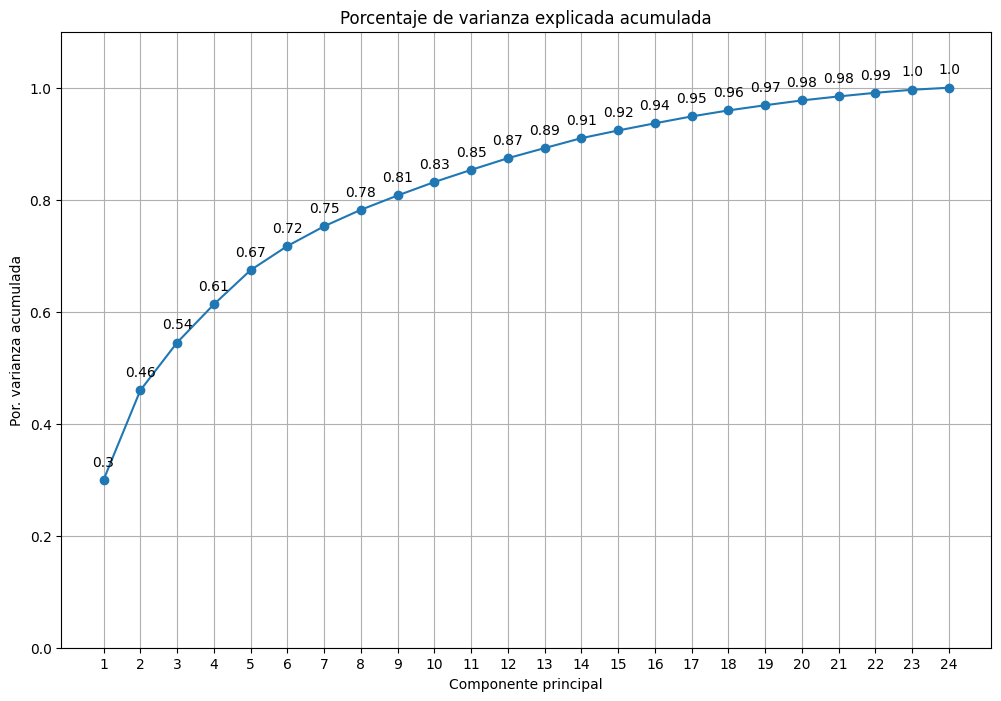

In [59]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca_ml.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
ax.plot(
    np.arange(len(df_scaler.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df_scaler.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca_ml.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')
ax.grid(True);

In [60]:
# me quedo con 7 componentes

### Ejercicio 10: Reducción de features

Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [61]:
pca_ml_10 = PCA(n_components=7)

pca_ml_10.fit(df_scaler)

df_pca_10 = pca_ml_10.transform(df_scaler)

In [62]:
df_10 = pd.DataFrame(
    data= df_pca_10,
    columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7']
)

In [63]:
df_10

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-2.254172,-0.864286,-0.068343,0.725155,5.309627,0.278329,-1.943614
1,-2.221566,-0.805947,-0.048057,0.716533,5.282442,0.318619,-1.971784
2,-3.381271,-1.038799,0.474542,1.650204,5.350524,1.293928,-2.081512
3,1.409058,-1.152702,-1.430842,-0.616309,3.647042,-2.149937,-2.209234
4,1.123787,-1.093036,-1.326571,-0.858790,3.929694,-2.392220,-2.149718
...,...,...,...,...,...,...,...
8613,2.634748,-2.608909,-0.029272,-0.131149,1.358243,0.166788,3.547168
8614,0.164336,-1.916526,-0.041448,-1.550799,-1.507404,-0.675810,2.547144
8615,-2.838587,1.573108,2.092597,1.025720,-1.748049,-0.827460,1.983052
8616,1.204355,-0.849842,-0.126565,-1.678178,0.347099,1.218577,3.274851


### ya está listo para usarlo con un modelo